In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
train_data = pd.read_csv(r"C:\Users\ARAVINTHAN\Downloads\archive\train.csv")
test_data = pd.read_csv(r"C:\Users\ARAVINTHAN\Downloads\archive\test.csv")

In [3]:
train_data.shape

(381109, 12)

In [3]:
# Preprocessing
X = train_data.drop(['id', 'Response'], axis=1)
y = train_data['Response']

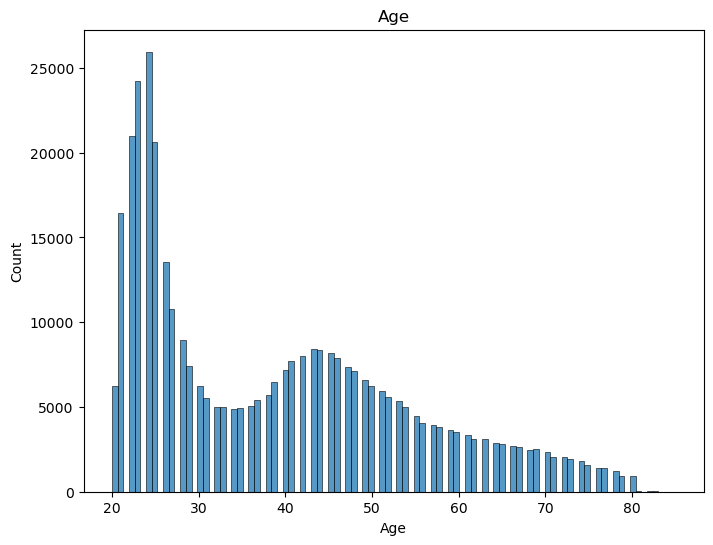

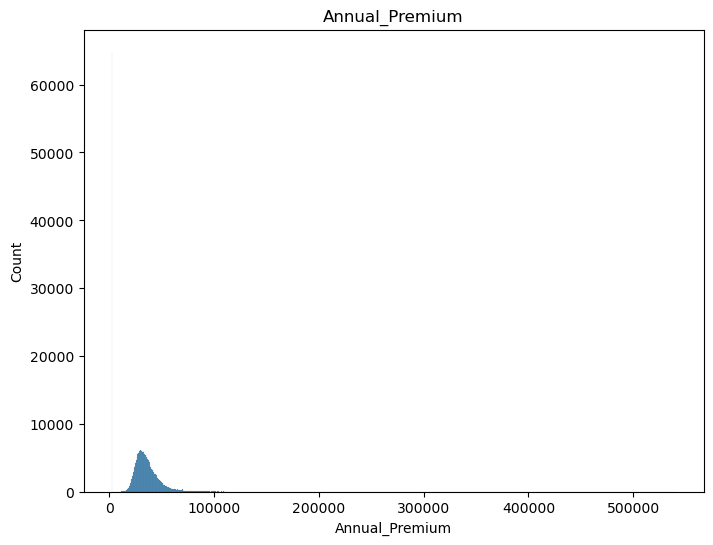

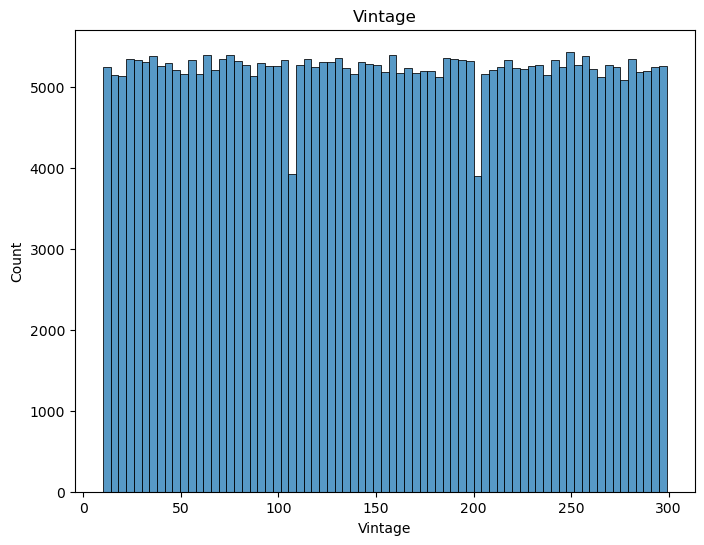

In [4]:
# Plot the distributions of numerical features
num_cols = ['Age', 'Annual_Premium', 'Vintage']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=False)
    plt.title(col)
    plt.show()

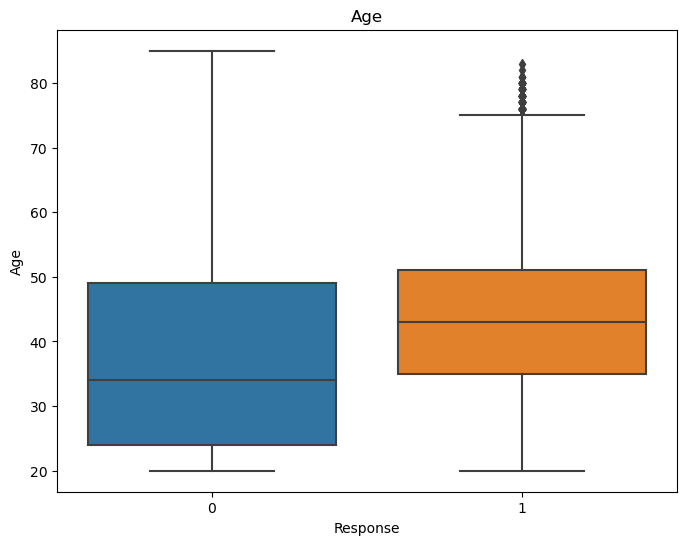

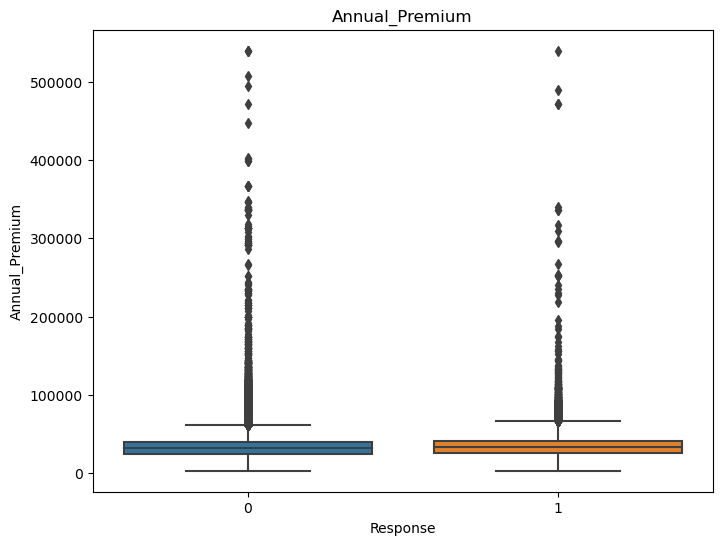

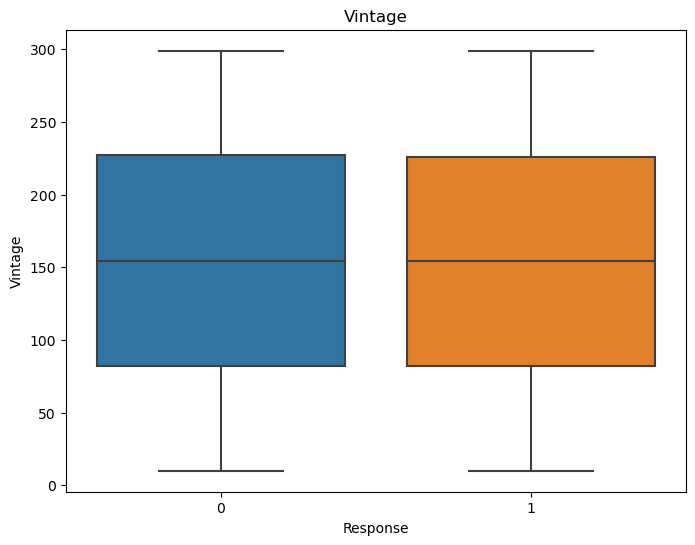

In [5]:
# Plot the box plots of numerical features by response variable
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Response', y=col, data=train_data)
    plt.title(col)
    plt.show()

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


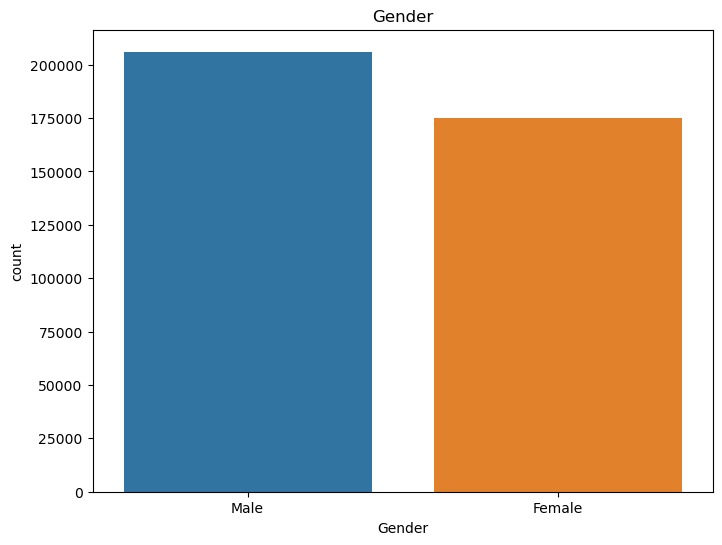

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


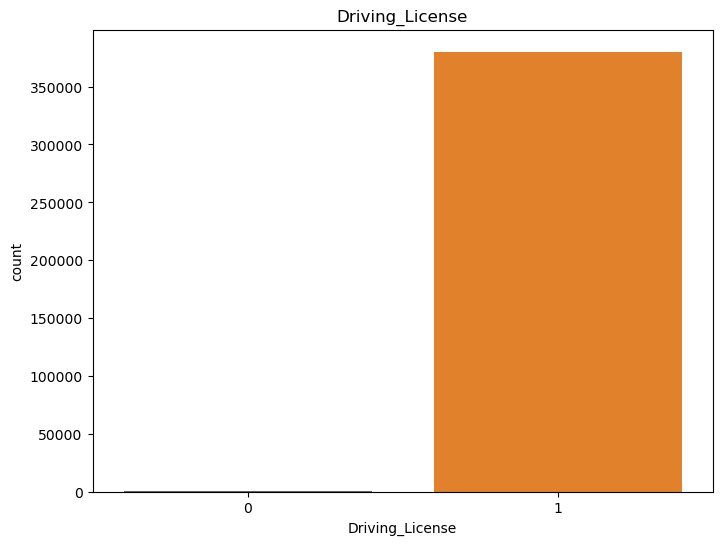

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


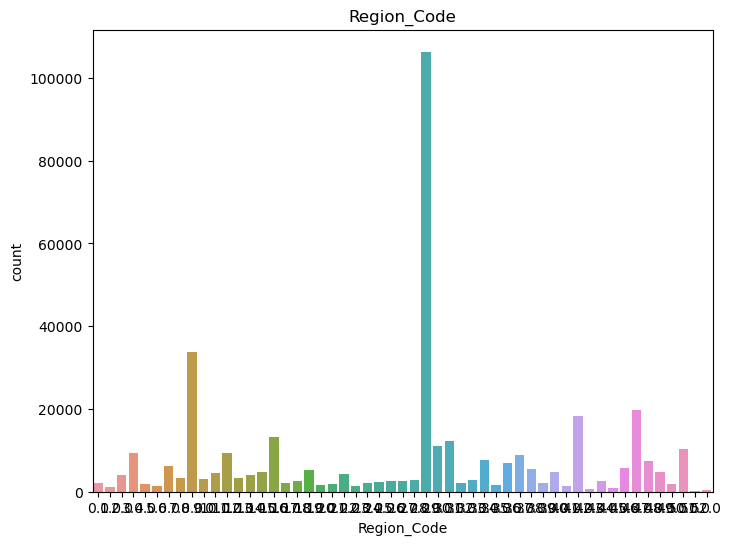

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


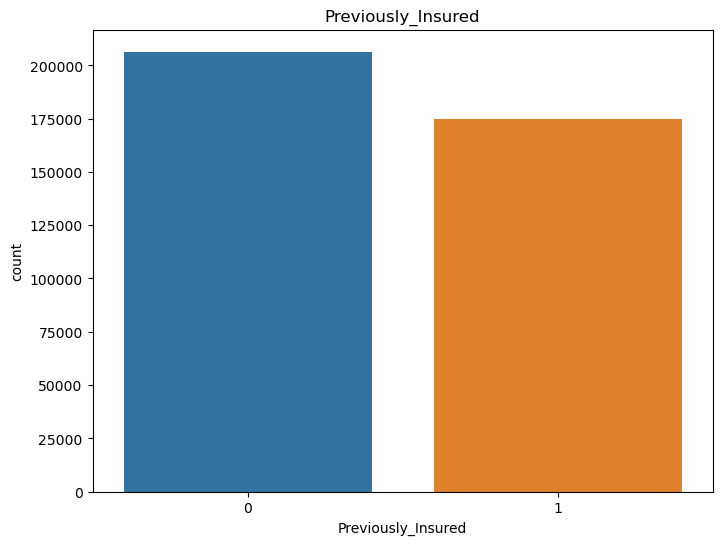

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


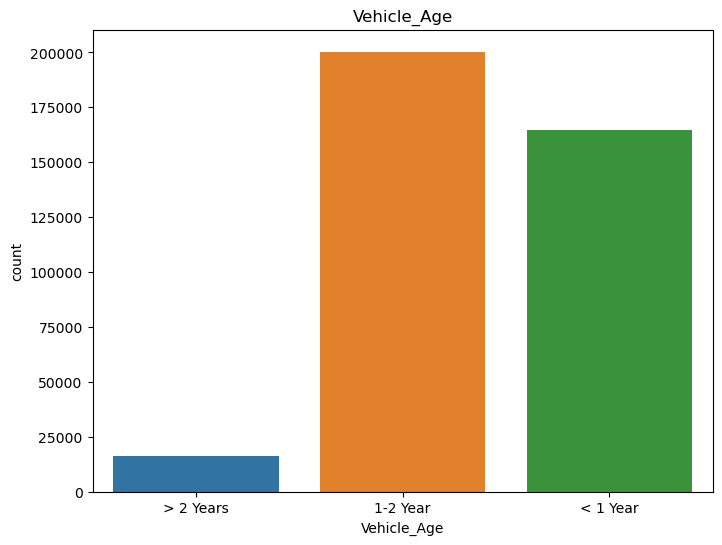

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


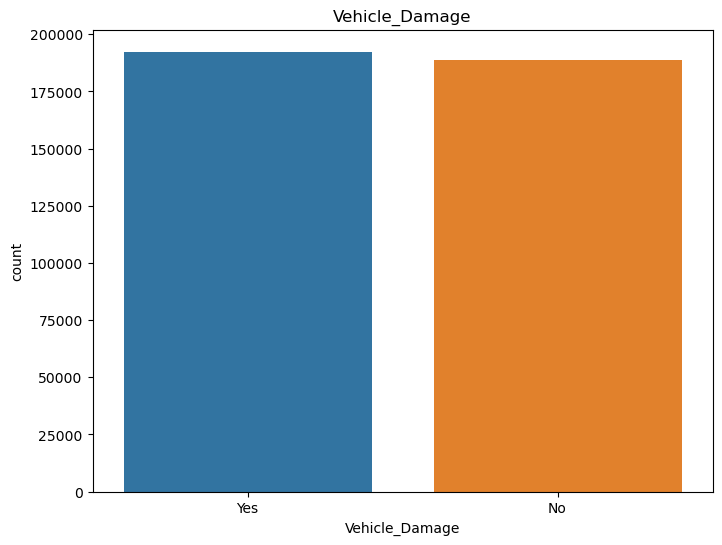

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


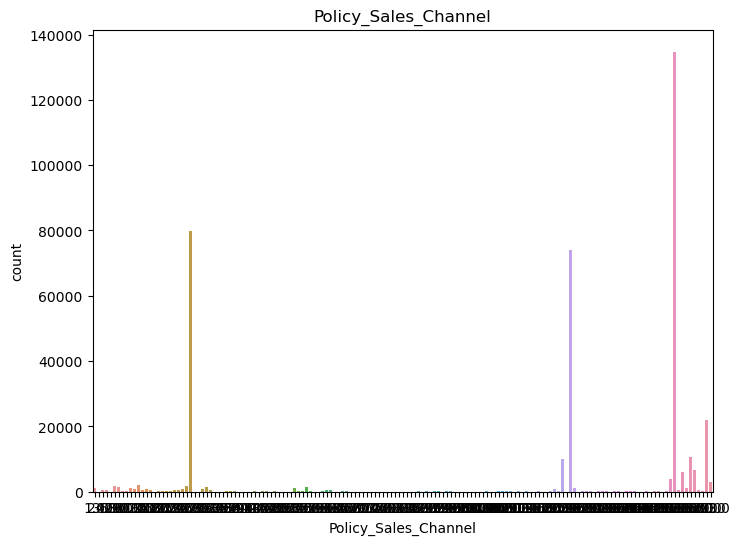

In [6]:
# Plot the count plots of categorical features
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(train_data[col])
    plt.title(col)
    plt.show()

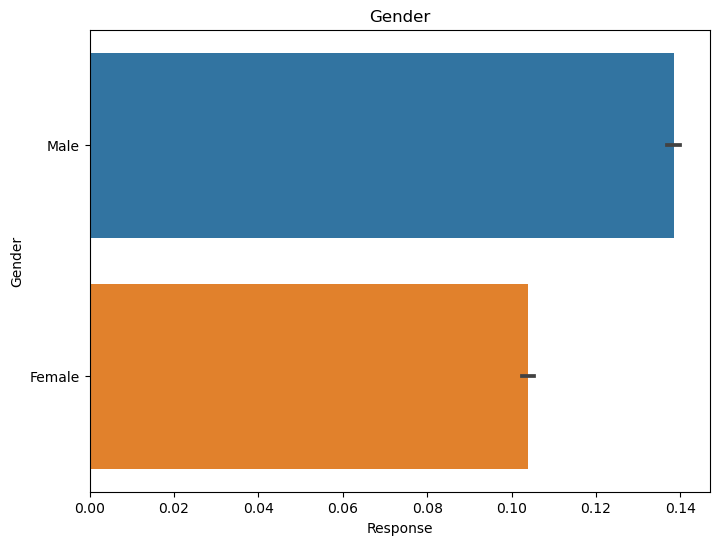

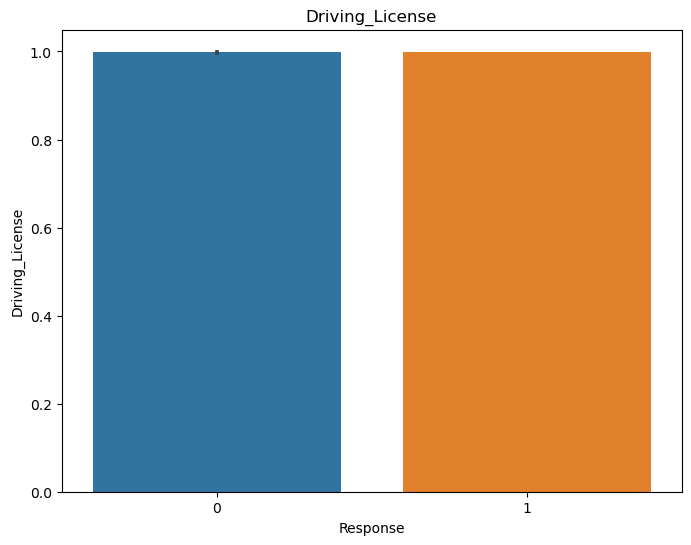

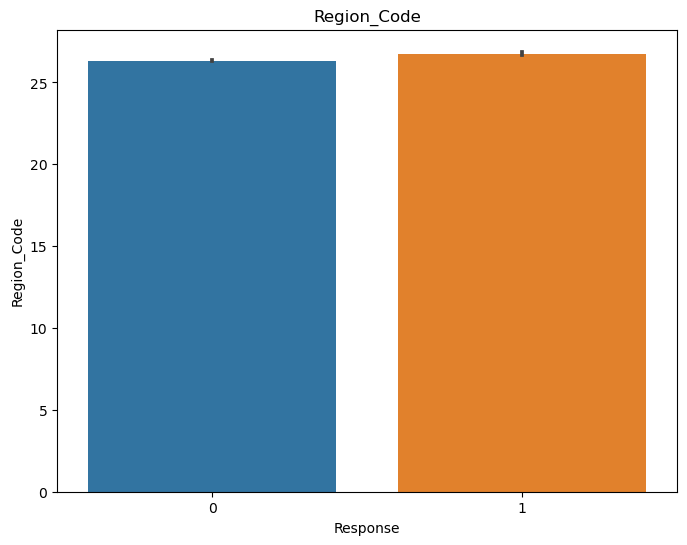

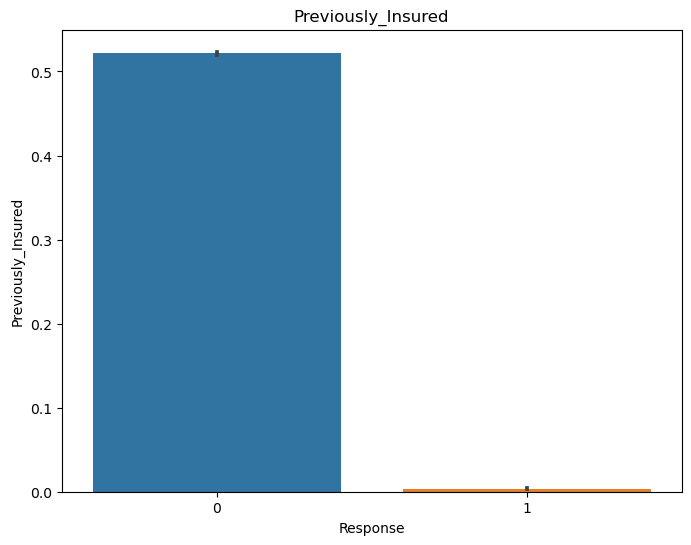

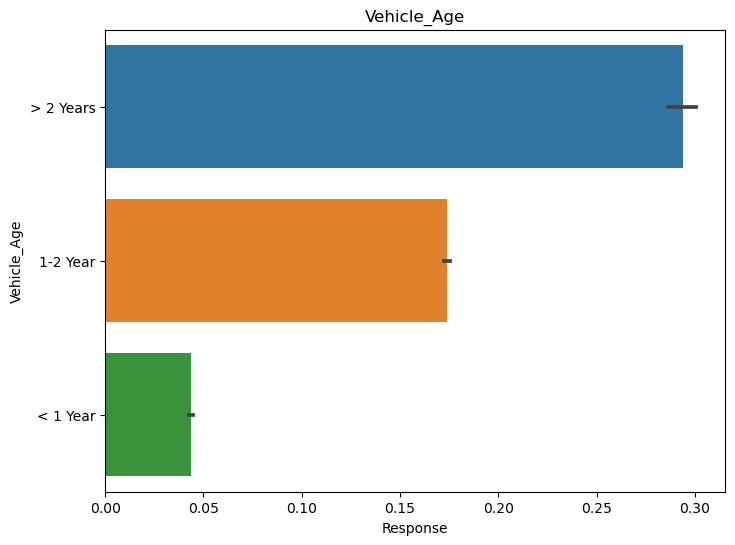

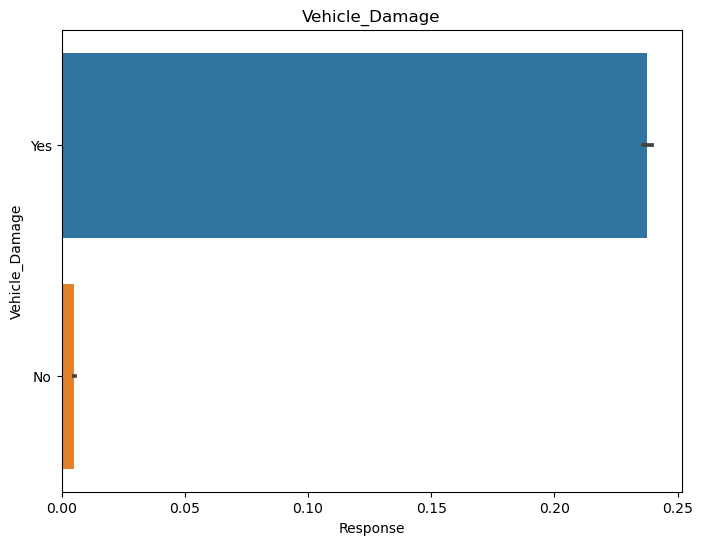

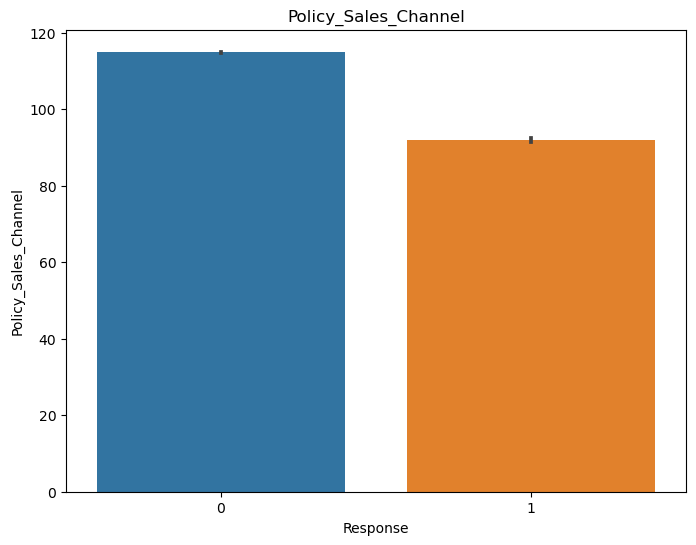

In [7]:
# Plot the bar plots of categorical features by response variable
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Response', y=col, data=train_data)
    plt.title(col)
    plt.show()

In [8]:
# One-hot encoding for categorical features
categorical_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])
X = preprocessor.fit_transform(X)

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Resampling with SMOTE to handle imbalance in response variable
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [11]:
# Pipeline for classification models
logistic = Pipeline(steps=[('classifier', LogisticRegression(penalty='l2'))])
tree = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
forest = Pipeline(steps=[('classifier', RandomForestClassifier())])
xgboost = Pipeline(steps=[('classifier', XGBClassifier() )])

In [12]:
# Hyperparameter tuning using GridSearchCV
param_grid_logistic = {'classifier__C': [0.1, 1, 10]}
param_grid_tree = {'classifier__max_depth': [5, 10, 15]}
param_grid_forest = {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [5, 10, 15]}
param_grid_xgboost = {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [5, 10, 15], 'classifier__learning_rate': [0.01, 0.1, 0.3]}
grid_search_logistic = GridSearchCV(logistic, param_grid=param_grid_logistic, cv=5)
grid_search_tree = GridSearchCV(tree, param_grid=param_grid_tree, cv=5)
grid_search_forest = GridSearchCV(forest, param_grid=param_grid_forest, cv=5)
grid_search_xgboost = GridSearchCV(xgboost, param_grid=param_grid_xgboost, cv=5)

In [14]:
# Fit the models and make predictions
models = [grid_search_logistic, grid_search_tree, grid_search_forest, grid_search_xgboost]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
for i in range(len(models)):
    models[i].fit(X_train_res, y_train_res)
    y_pred = models[i].predict(X_test)
    y_prob = models[i].predict_proba(X_test)[:, 1]
    print(model_names[i] + ':')
    print('Test Accuracy:', accuracy_score(y_test, y_pred))
    print('Test AUC-ROC:', roc_auc_score(y_test, y_prob))
    print()

C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Logistic Regression:
Test Accuracy: 0.6961507176405762
Test AUC-ROC: 0.8390078378924116

Decision Tree:
Test Accuracy: 0.7081682453884706
Test AUC-ROC: 0.8326972522225603

Random Forest:
Test Accuracy: 0.6877410721314057
Test AUC-ROC: 0.8397687875676448

XGBoost:
Test Accuracy: 0.7128519325129228
Test AUC-ROC: 0.8375026304713805



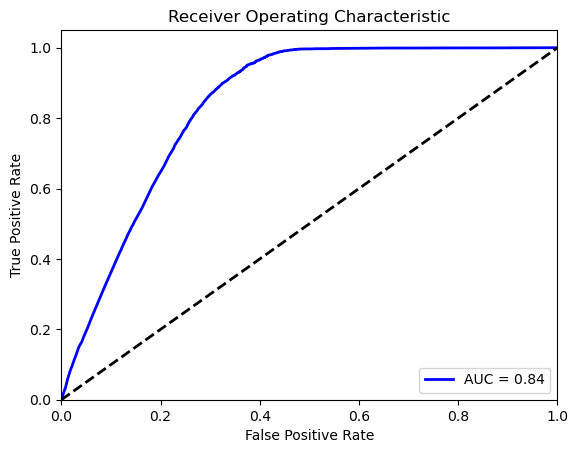

In [15]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc=auc(fpr, tpr)
plt.plot(fpr,tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
X_y=test_data.drop(['id'],axis=1)

In [22]:
# Preprocess test data
X_test_transformed = preprocessor.transform(X_y)

In [40]:
# Make predictions on test data
y_pred_test = grid_search_xgboost.predict(X_test_transformed)

In [41]:
submission=pd.DataFrame({'id': test_data['id'], 'Response': y_pred_test})

In [42]:
submission.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


C:\Users\ARAVINTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


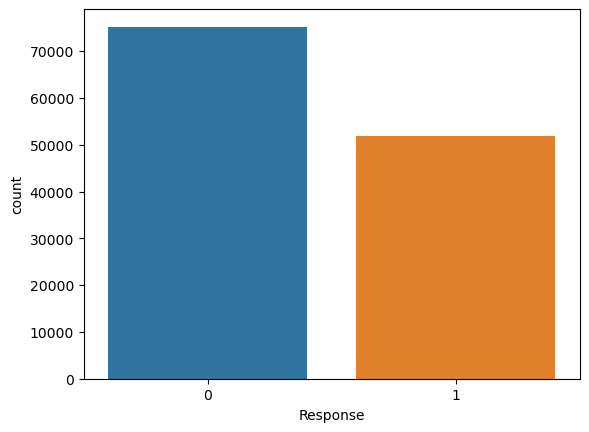

0    75209
1    51828
Name: Response, dtype: int64


In [39]:
#visualize the distribution of target varible
sns.countplot(submission['Response'])
plt.show()
print(submission['Response'].value_counts())